# Exploratory Data Analysis of Insurance Data


### Importing and preparing the data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 7 variables on the dataset: age, sex, bmi, children, smoker, region and charges.

### EDA

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


To calculate the correlation between the variables, first I convert the string objects into numeric ones:

In [5]:
data['smoker_num'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex_num'] = data['sex'].map({'female': 1, 'male': 0})
data['region_num'] = data['region'].map({'southwest': 3, 'southeast': 2,'northwest':1, 'northeast':0})

In this way: 
- Smoker: 1=yes, 0=no; 
- Sex: 1=female, 0=male; 
- Region: southwest= 3, southeast= 2, northwest=1, northeast=0 

And as BMI doesn´t give me much information, I convert it in a way that makes sense.

In [6]:
#bmi<18.5 underweight
#18.5 - 24.9 - healthy
#25 - 30 - overweight
#30 - 40 - obese
#>40 extreme obese
defi=['Underweight', 'Healthy', 'Overweight', 'Obese', 'Extreme obese']

criteria = [data['bmi'].between(15, 18.5), 
            data['bmi'].between(18.5, 25), 
            data['bmi'].between(25, 30),
            data['bmi'].between(30, 40),
            data['bmi'].between(40, 55)]

values = [0,1, 2, 3,4]

data['bmi_cat'] = np.select(criteria, defi, 0)
data['bmi_cat_num'] = np.select(criteria, values, 0)

In [7]:
data.describe()

,age,bmi,children,charges,smoker_num,sex_num,region_num,bmi_cat_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.494768,1.515695,2.394619
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.500160,1.104885,0.898616
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,2.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,2.000000,3.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,2.000000,3.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000,4.000000


<AxesSubplot: >

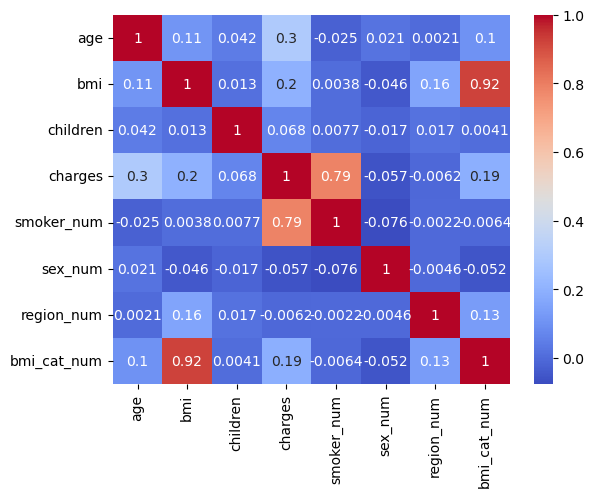

In [8]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap ='coolwarm')

From the heatmap, the fact that a person smokes or not is the greatest influencer on the charges, followed by age and BMI. Sex, children and and region does not have such influence on the variable.

### Charge

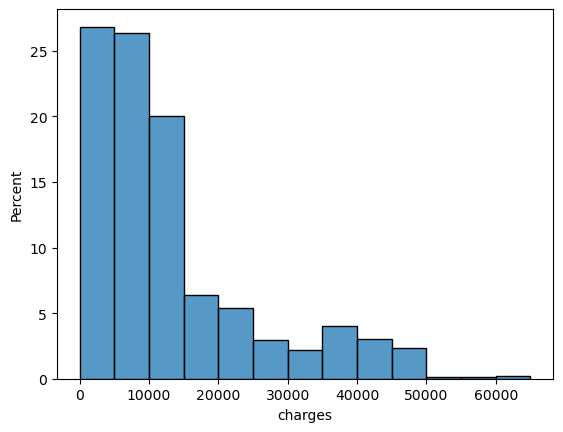

In [9]:
sns.histplot(data['charges'],binrange=(0,65000),bins= 13,stat='percent')
plt.show()

In [10]:
def sum_var(x):
    return (x.value_counts())/sum(x.value_counts())*100

In [11]:
def avg_per_group(x):
    avg_per_group=np.zeros(len(sum_var(x)))  
    for i in range (len(avg_per_group)):
        avg_per_group[i]=np.mean(data.charges[x==i])
    return avg_per_group

In [12]:
def avg_per_smokers(x):
    avg_per_smokers=np.zeros(len(sum_var(x)))  
    for i in range (len(avg_per_smokers)):
        avg_per_smokers[i]=np.mean(smokers.charges[x==i])
    return avg_per_smokers

In [13]:
def avg_per_nonsmokers(x):
    avg_per_nonsmokers=np.zeros(len(sum_var(x)))  
    for i in range (len(avg_per_nonsmokers)):
        avg_per_nonsmokers[i]=np.mean(nonsmokers.charges[x==i])
    return avg_per_nonsmokers

In [14]:
def label1(var1,var2):
    ax1.get_yaxis().set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    for x,y in zip(var1, var2):

        label = "{:.0f}".format(y)

        ax1.annotate(label + '%', # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [15]:
def label2(var1,var2):  
    ax2.get_yaxis().set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    for x,y in zip(var1,var2):

        label = "{:.0f}".format(y)

        ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### Age

In [16]:
counts,bins=np.histogram(data['age'],range=(18,68))
counts,bins
counts_p = counts/sum(counts)*100

In [17]:
avg_per_bins=np.zeros(len(bins)-1)  
   
for i in range (len(avg_per_bins)):
    avg_per_bins[i]=np.mean(data.charges[(data['age']>=bins[i]) & (data['age']<=bins[i+1])])  
avg_per_bins

array([ 8828.03264512, 10048.98598446, 10653.12830938, 12262.82356461,
       12331.58798158, 16063.17445265, 15505.00632081, 16096.64764899,
       19222.41378549, 21542.59206711])

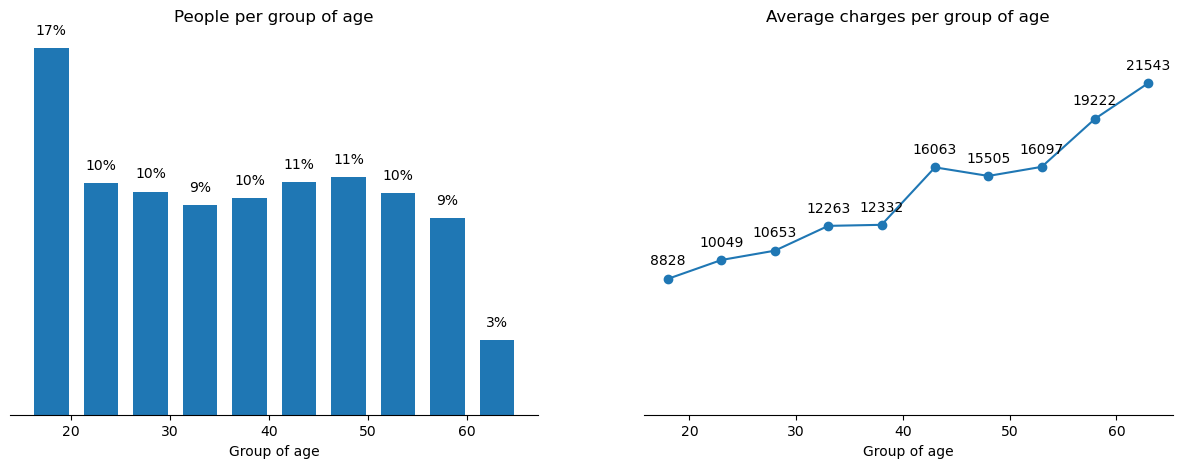

In [18]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5),facecolor='white')

#counts,bins=np.histogram(data['age'],range=(18,68),bins=10)
#sns.histplot(data['age'],stat='percent',binrange=(18,68),bins=10, ax=ax1)
ax1.bar(bins[:-1],counts_p, width=3.5)
ax1.set_xlabel('Group of age')
ax1.set_title('People per group of age')
label1(bins,counts_p)

    
ax2.plot(bins[:-1],avg_per_bins,'-o')
ax2.set_ylim(0,25000)
ax2.set_xlabel('Group of age')
ax2.set_ylabel('Charges')
ax2.set_title('Average charges per group of age')

label2(bins[:-1],avg_per_bins)

plt.show()

### Sex

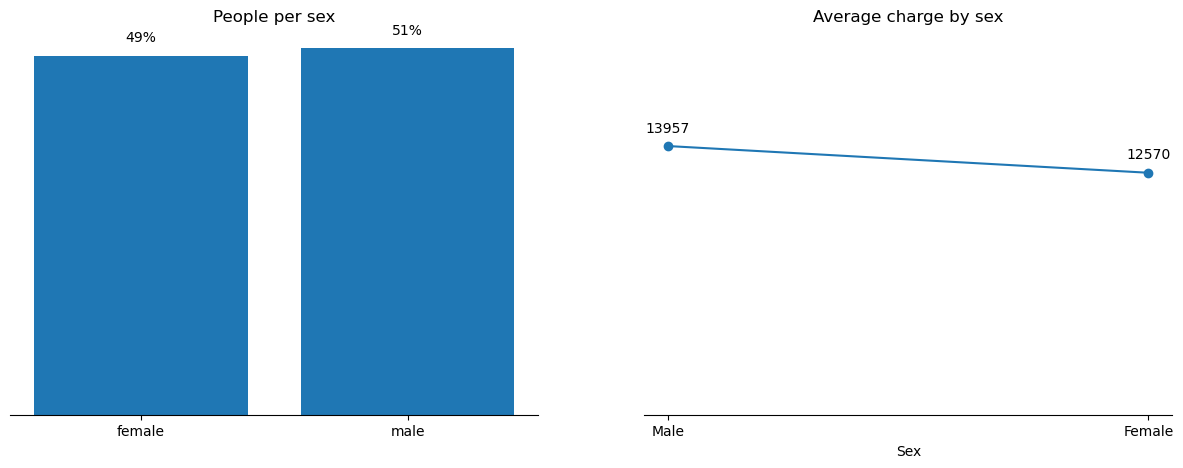

In [19]:
x=data['sex_num']

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(data['sex'].unique(), sum_var(data['sex']).sort_index())
ax1.set_ylabel('Percent')
ax1.set_title('People per sex')
label1(data['sex'].unique(), sum_var(data['sex']).sort_index())

ax2.plot(['Male','Female'], avg_per_group(x),'-o')
ax2.set_ylim(0,20000)
ax2.set_xlabel('Sex')
ax2.set_title('Average charge by sex')
label2(['Male','Female'],avg_per_group(x)) 

plt.show()

## BMI

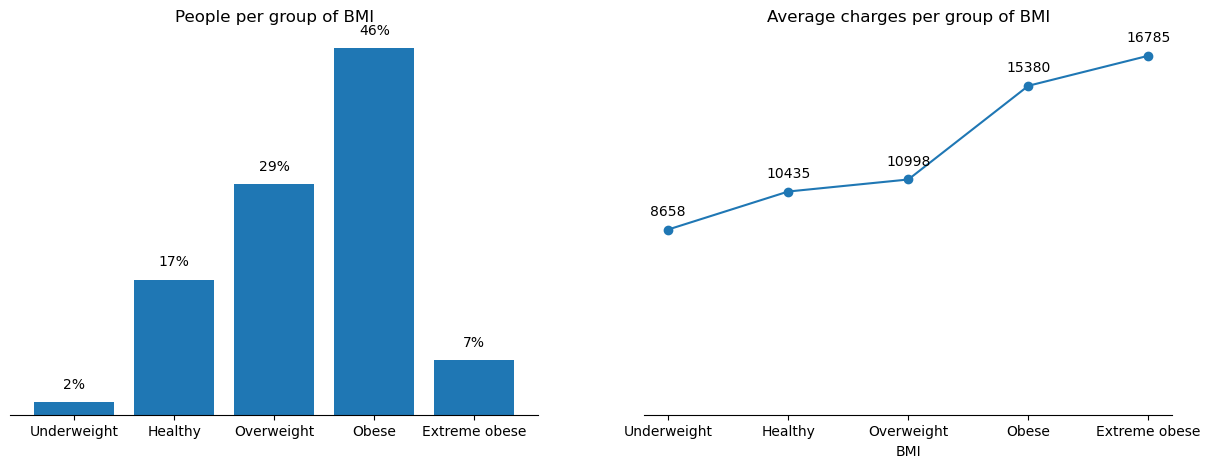

In [20]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(defi, sum_var(data['bmi_cat_num']).sort_index())
ax1.set_ylabel('Percent')
ax1.set_title('People per group of BMI')
label1(defi, sum_var(data['bmi_cat_num']).sort_index())

ax2.plot(defi, avg_per_group(data['bmi_cat_num'].sort_index()),'-o')
ax2.set_ylim(0,18000)
ax2.set_xlabel('BMI')
ax2.set_ylabel('Charge')
ax2.set_title('Average charges per group of BMI')
label2(defi,avg_per_group(data['bmi_cat_num'])) 


### Children

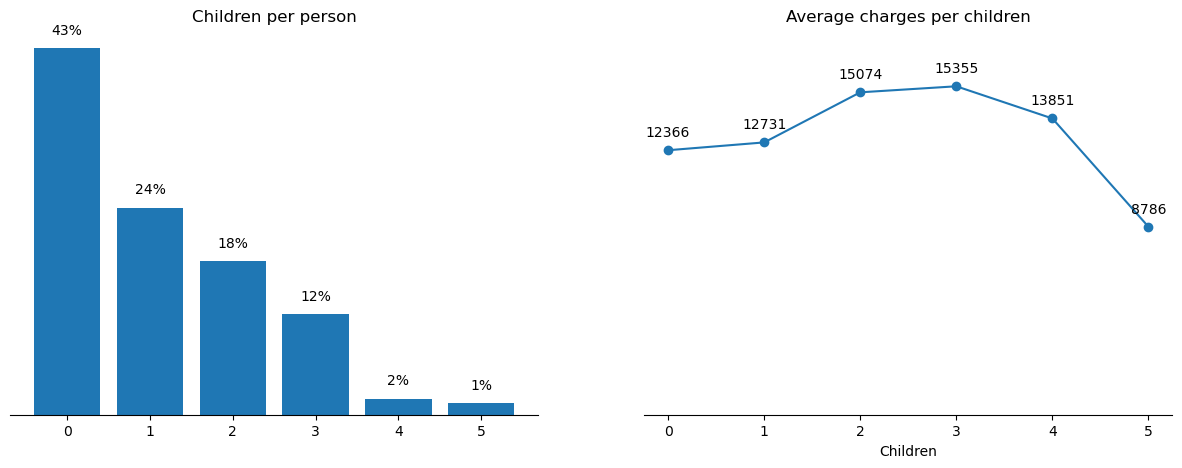

In [21]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar([0,1,2,3,4,5], sum_var(data['children']).sort_index())
ax1.set_title('Children per person')
label1([0,1,2,3,4,5], sum_var(data['children']).sort_index())

ax2.plot([0,1,2,3,4,5], avg_per_group(data['children'].sort_index()),'-o')
ax2.set_ylim(0,18000)
ax2.set_xlabel('Children')
ax2.set_title('Average charges per children')
label2([0,1,2,3,4,5],avg_per_group(data['children']))

### Region

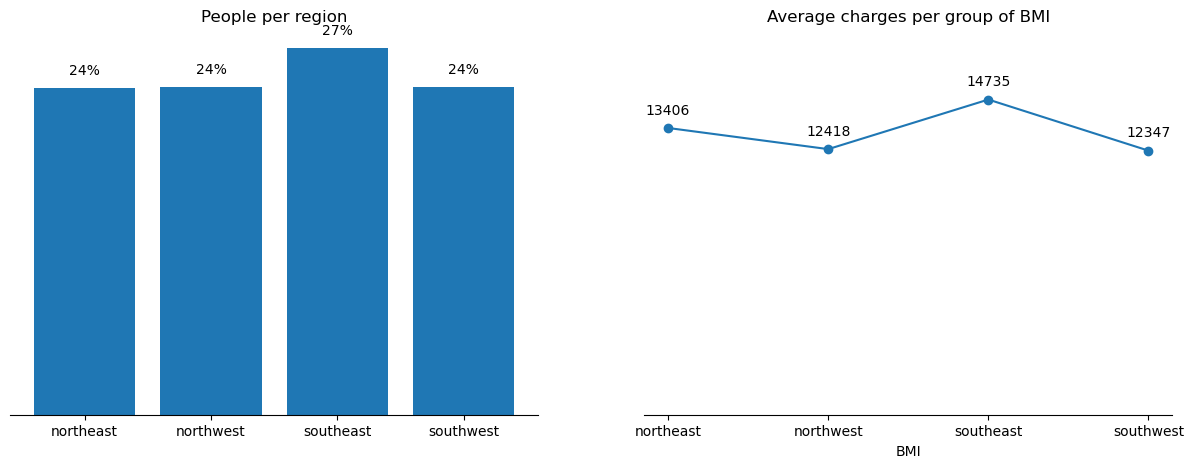

In [22]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(['northeast','northwest','southeast','southwest'], sum_var(data['region_num']).sort_index())
ax1.set_ylabel('Percent')
ax1.set_title('People per region')
label1(['northeast','northwest','southeast','southwest'], sum_var(data['region_num']).sort_index())

ax2.plot(['northeast','northwest','southeast','southwest'], avg_per_group(data['region_num'].sort_index()),'-o')
ax2.set_ylim(0,18000)
ax2.set_xlabel('BMI')
ax2.set_ylabel('Charge')
ax2.set_title('Average charges per group of BMI')
label2(['northeast','northwest','southeast','southwest'],avg_per_group(data['region_num']))

### Smoker

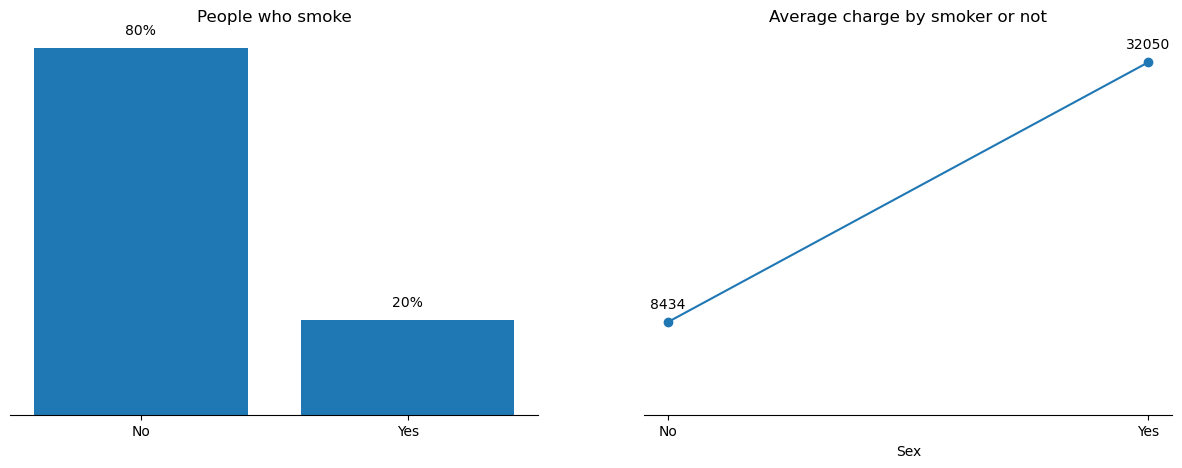

In [23]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(['No','Yes'], sum_var(data['smoker']).sort_index())
ax1.set_title('People who smoke')
label1(['No','Yes'], sum_var(data['smoker']).sort_index())

ax2.plot(['No','Yes'], avg_per_group(data['smoker_num']),'-o')
ax2.set_ylim(0,35000)
ax2.set_xlabel('Sex')
ax2.set_title('Average charge by smoker or not')
label2(['No','Yes'],avg_per_group(data['smoker_num'])) 

plt.show()

## SMOKERS vs NON SMOKERS

In [24]:
smokers=data[data['smoker_num']==1]

In [25]:
nonsmokers=data[data['smoker_num']==0]

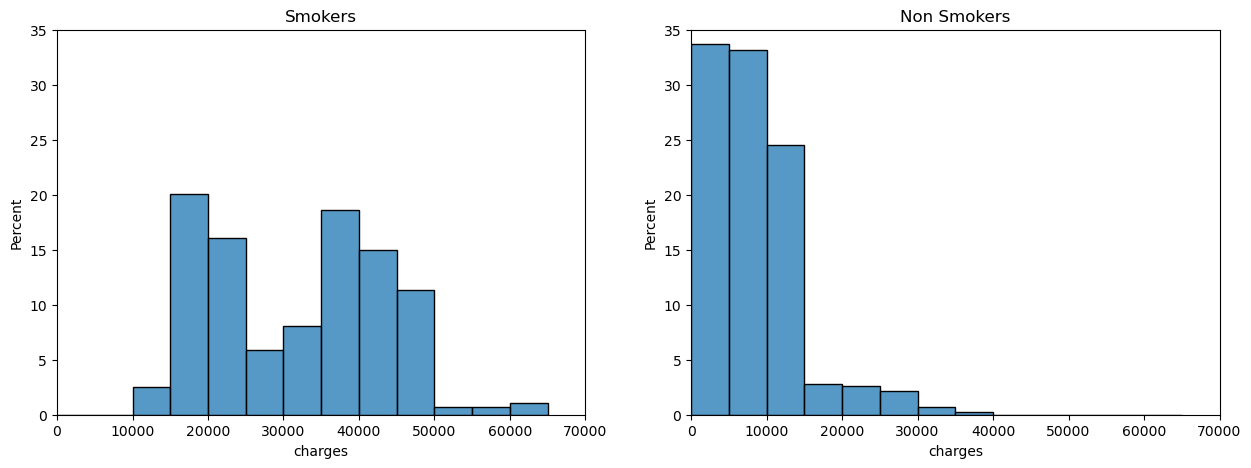

In [26]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(smokers['charges'],binrange=(0,65000),bins= 13,stat='percent',ax=ax1)
ax1.set_title('Smokers')
ax1.set_ylim(0,35)
ax1.set_xlim(0,70000)
sns.histplot(nonsmokers['charges'],binrange=(0,65000),bins= 13,stat='percent',ax=ax2)
ax2.set_title('Non Smokers')
ax2.set_ylim(0,35)
ax2.set_xlim(0,70000)
plt.show()

### Age

In [112]:
s_counts,s_bins=np.histogram(smokers['age'],range=(18,68))
ns_counts,ns_bins=np.histogram(nonsmokers['age'],range=(18,68))

s_counts_p = s_counts/sum(s_counts)*100
ns_counts_p = ns_counts/sum(ns_counts)*100

s_avg_per_bins=np.zeros(len(s_bins)-1)  
ns_avg_per_bins=np.zeros(len(ns_bins)-1)

for i in range (len(s_avg_per_bins)):
    s_avg_per_bins[i]=np.mean(smokers.charges[(smokers['age']>=s_bins[i]) & (smokers['age']<=s_bins[i+1])])
    ns_avg_per_bins[i]=np.mean(nonsmokers.charges[(nonsmokers['age']>=ns_bins[i]) & (nonsmokers['age']<=ns_bins[i+1])])

In [113]:
s_counts,s_bins

(array([47, 30, 28, 31, 23, 38, 25, 20, 20, 12], dtype=int64),
 array([18., 23., 28., 33., 38., 43., 48., 53., 58., 63., 68.]))

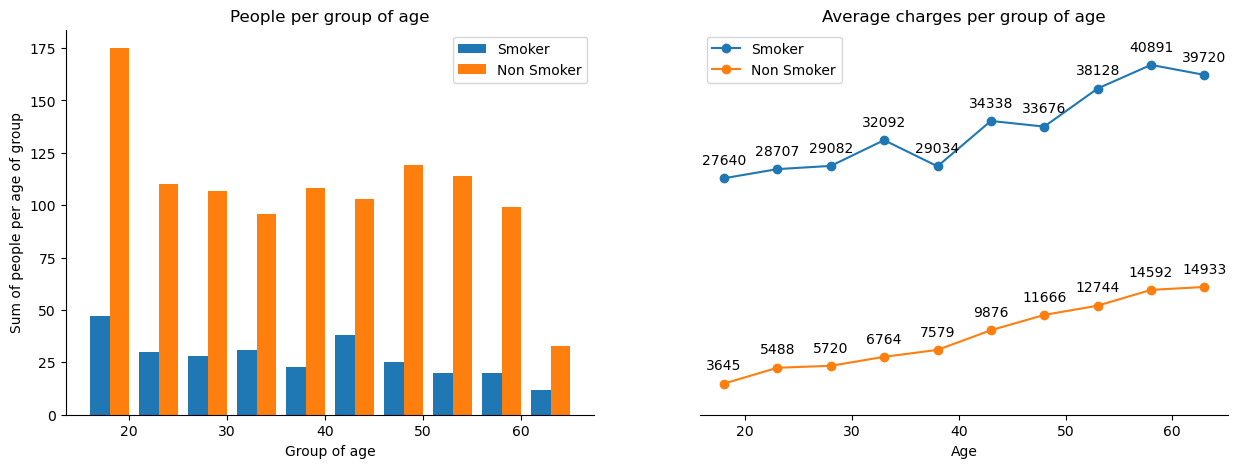

In [115]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(s_bins[:-1]-1,s_counts, width=2, label='Smoker')
ax1.bar(ns_bins[:-1]+1,ns_counts, width=2, label='Non Smoker')
ax1.legend()
ax1.set_xlabel('Group of age')
ax1.set_ylabel('Sum of people per age of group')
ax1.set_title('People per group of age')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax2.plot(s_bins[:-1],s_avg_per_bins,'-o', label='Smoker')
ax2.plot(ns_bins[:-1],ns_avg_per_bins,'-o', label='Non Smoker')
ax2.set_ylim(0,45000)
ax2.set_xlabel('Age')
ax2.set_ylabel('Charges')
ax2.legend()
ax2.set_title('Average charges per group of age')
label2(s_bins[:-1],s_avg_per_bins) 
label2(ns_bins[:-1],ns_avg_per_bins)

plt.show()

### Sex

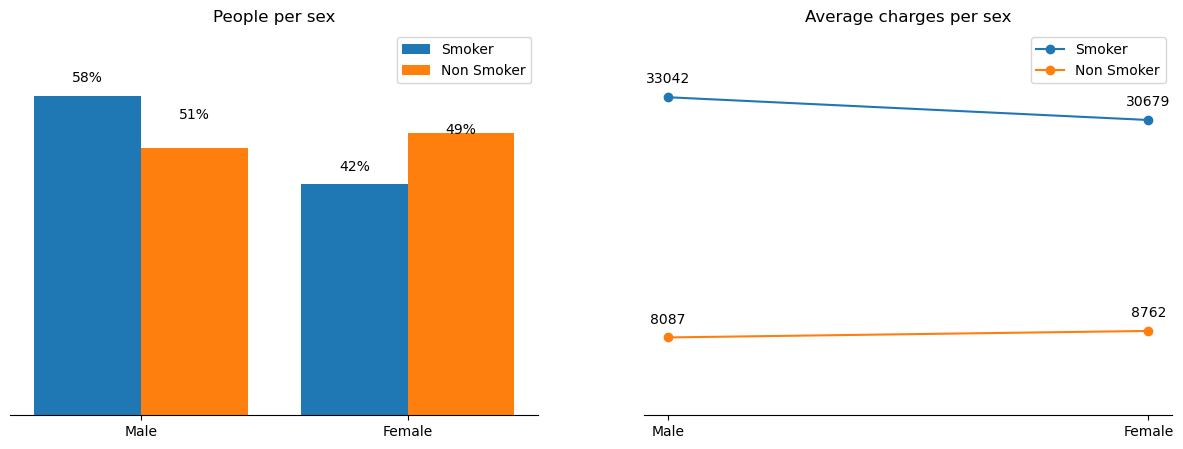

In [29]:
x = np.arange(2)
width = 0.4


fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(x-0.2, sum_var(smokers['sex_num']).sort_index(),width, label='Smoker')
ax1.bar(x+0.2,sum_var(nonsmokers['sex_num']).sort_index(),width,label='Non Smoker')
ax1.set_xticks(np.arange(2),['Male','Female'])
ax1.set_ylabel('Percent')
ax1.set_ylim(0,70)
ax1.legend()
ax1.set_title('People per sex')
label1(x-0.2, sum_var(smokers['sex_num']))
label1(x+0.2, sum_var(nonsmokers['sex_num']))

ax2.plot(['Male','Female'],avg_per_smokers(smokers['sex_num']),'-o', label='Smoker')
ax2.plot(['Male','Female'],avg_per_nonsmokers(nonsmokers['sex_num']),'-o', label='Non Smoker')
ax2.set_ylim(0,40000)
label2(['Male','Female'], avg_per_smokers(smokers['sex_num']))
label2(['Male','Female'], avg_per_nonsmokers(nonsmokers['sex_num']))
ax2.set_title('Average charges per sex')
ax2.legend()
plt.show()

### BMI

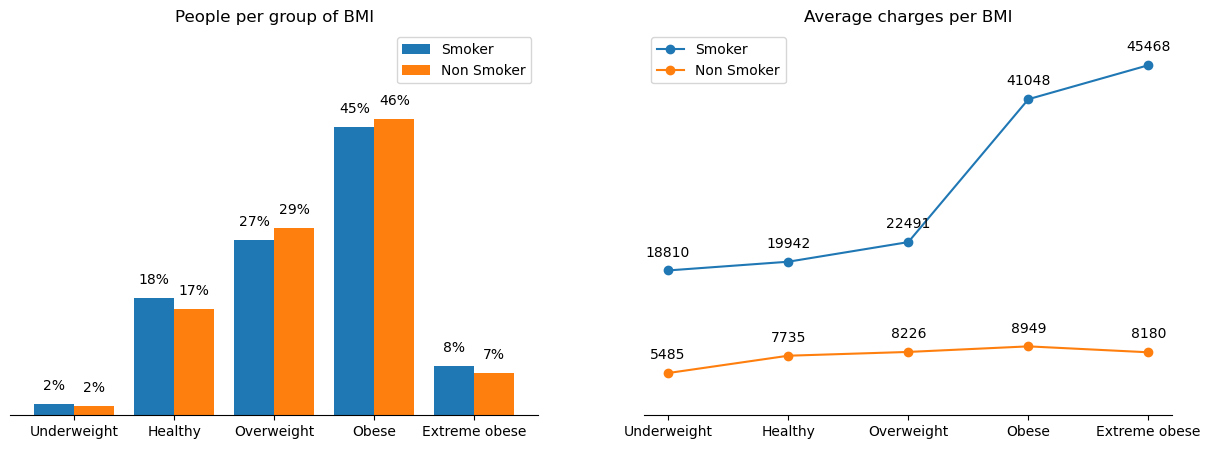

In [30]:
x = np.arange(5)
width = 0.4


fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(x-0.2, sum_var(smokers['bmi_cat_num']).sort_index(),width, label='Smoker')
ax1.bar(x+0.2,sum_var(nonsmokers['bmi_cat_num']).sort_index(),width,label='Non Smoker')
ax1.set_xticks(np.arange(5),defi)
ax1.set_ylabel('Percent')
ax1.set_ylim(0,60)
ax1.legend()
ax1.set_title('People per group of BMI')
label1(x-0.2, sum_var(smokers['bmi_cat_num']).sort_index())
label1(x+0.2, sum_var(nonsmokers['bmi_cat_num']).sort_index())

ax2.plot(defi,avg_per_smokers(smokers['bmi_cat_num']),'-o', label='Smoker')
ax2.plot(defi,avg_per_nonsmokers(nonsmokers['bmi_cat_num']),'-o', label='Non Smoker')
ax2.set_ylim(0,50000)
label2(defi, avg_per_smokers(smokers['bmi_cat_num']))
label2(defi, avg_per_nonsmokers(nonsmokers['bmi_cat_num']))
ax2.set_title('Average charges per BMI')
ax2.legend()

plt.show()

### Children

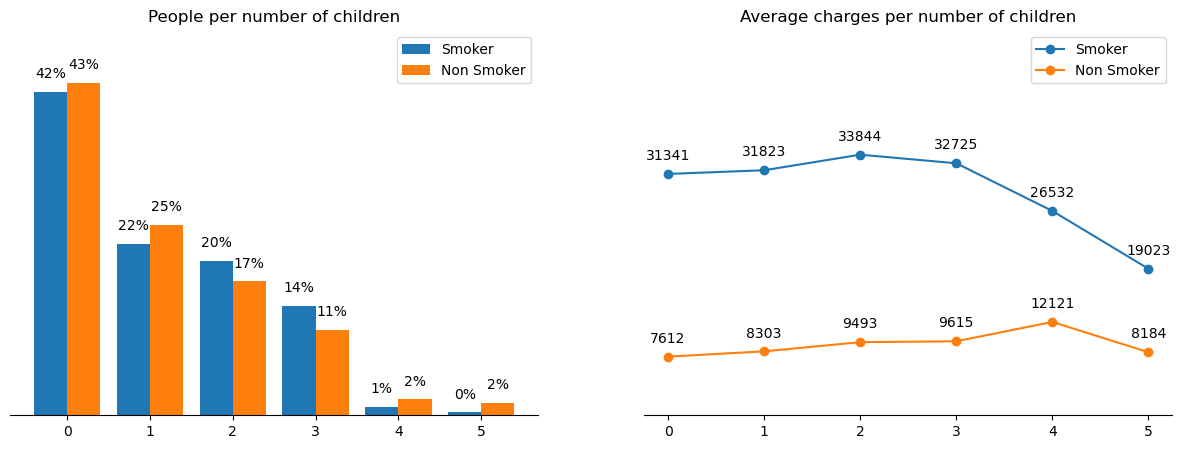

In [31]:
x = np.arange(6)
width = 0.4


fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(x-0.2, sum_var(smokers['children']).sort_index(),width, label='Smoker')
ax1.bar(x+0.2,sum_var(nonsmokers['children']).sort_index(),width,label='Non Smoker')
#ax1.set_xticks(np.arange(5),defi)
ax1.set_ylabel('Percent')
ax1.set_ylim(0,50)
ax1.legend()
ax1.set_title('People per number of children')
label1(x-0.2, sum_var(smokers['children']).sort_index())
label1(x+0.2, sum_var(nonsmokers['children']).sort_index())

ax2.plot(x,avg_per_smokers(smokers['children']),'-o', label='Smoker')
ax2.plot(x,avg_per_nonsmokers(nonsmokers['children']),'-o', label='Non Smoker')
ax2.set_ylim(0,50000)
label2(x, avg_per_smokers(smokers['children']))
label2(x, avg_per_nonsmokers(nonsmokers['children']))
ax2.set_title('Average charges per number of children')
ax2.legend()

plt.show()

### Region

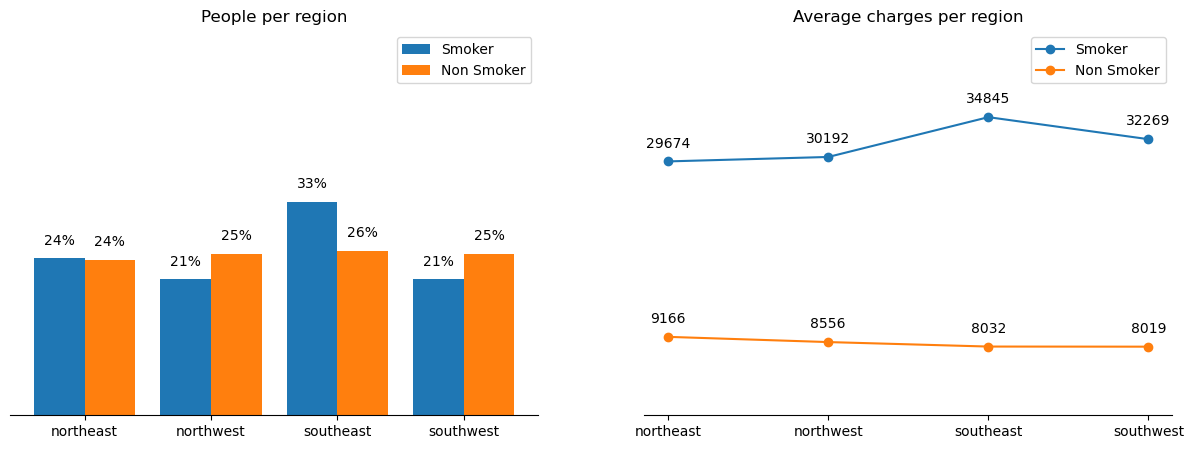

In [32]:
reg=['northeast','northwest','southeast','southwest']

x = np.arange(4)
width = 0.4


fig,(ax1, ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(x-0.2, sum_var(smokers['region_num']).sort_index(),width, label='Smoker')
ax1.bar(x+0.2,sum_var(nonsmokers['region_num']).sort_index(),width,label='Non Smoker')
ax1.set_xticks(x,reg)
ax1.set_ylabel('Percent')
ax1.set_ylim(0,60)
ax1.legend()
ax1.set_title('People per region')
label1(x-0.2, sum_var(smokers['region_num']).sort_index())
label1(x+0.2, sum_var(nonsmokers['region_num']).sort_index())

ax2.plot(reg,avg_per_smokers(smokers['region_num']),'-o', label='Smoker')
ax2.plot(reg,avg_per_nonsmokers(nonsmokers['region_num']),'-o', label='Non Smoker')
ax2.set_ylim(0,45000)
label2(reg, avg_per_smokers(smokers['region_num']))
label2(reg, avg_per_nonsmokers(nonsmokers['region_num']))
ax2.set_title('Average charges per region')
ax2.legend()

plt.show()